In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pylab as pylab
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('cleaned_resume.csv')
df

,Category,Resume_details
0,peopleSoft,anubhav kumar singh core competencies scriptin...
1,peopleSoft,classification internal classification interna...
2,peopleSoft,sirazuddin bangalore india sirazuddin bangalor...
3,peopleSoft,peoplesoft admin varkala vikas career objectiv...
4,peopleSoft,peoplesoft administration vivekanand sayana ca...
...,...,...
74,workday,swamy sarnala workday integration consultant n...
75,workday,srikanth workday hcm consultant seeking suitab...
76,workday,workday hcm fcm name kumar role workday consul...
77,workday,mathu kumaran venki venkateswarlu workday cons...


## Now Label Encode is doing for Preprocessing

In [3]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
df['Labelencode']=Encoder.fit_transform(df['Category'])
df

,Category,Resume_details,Labelencode
0,peopleSoft,anubhav kumar singh core competencies scriptin...,1
1,peopleSoft,classification internal classification interna...,1
2,peopleSoft,sirazuddin bangalore india sirazuddin bangalor...,1
3,peopleSoft,peoplesoft admin varkala vikas career objectiv...,1
4,peopleSoft,peoplesoft administration vivekanand sayana ca...,1
...,...,...,...
74,workday,swamy sarnala workday integration consultant n...,3
75,workday,srikanth workday hcm consultant seeking suitab...,3
76,workday,workday hcm fcm name kumar role workday consul...,3
77,workday,mathu kumaran venki venkateswarlu workday cons...,3


In [4]:
df.describe()

,Labelencode
count,79.000000
mean,1.405063
std,1.182338
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,3.000000


In [5]:
df['Labelencode'].unique()

array([1, 0, 2, 3])

In [6]:
df['Category'].unique()

array(['peopleSoft', 'Reactjs', 'sql_develop', 'workday'], dtype=object)

In [7]:
df.isnull().sum()

Category          0
Resume_details    0
Labelencode       0
dtype: int64

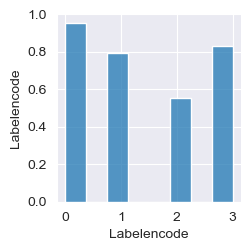

In [8]:
sns.pairplot(df)

# Model Building

## Train Test Split

In [9]:
x=df['Resume_details'].values  ##independent
y=df['Category'].values     ##dependent

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42,stratify=y)

In [11]:
x_train.shape,x_test.shape

((55,), (24,))

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [13]:
x_train = tf_idf.fit_transform(x_train)
x_test = tf_idf.transform(x_test)

In [14]:
x_train.shape,x_test.shape

((55, 3633), (24, 3633))

In [15]:
print(y_train)

['Reactjs' 'workday' 'workday' 'workday' 'workday' 'Reactjs' 'Reactjs'
 'sql_develop' 'peopleSoft' 'Reactjs' 'workday' 'workday' 'peopleSoft'
 'sql_develop' 'sql_develop' 'sql_develop' 'sql_develop' 'workday'
 'Reactjs' 'peopleSoft' 'peopleSoft' 'Reactjs' 'peopleSoft' 'Reactjs'
 'peopleSoft' 'Reactjs' 'workday' 'workday' 'Reactjs' 'sql_develop'
 'workday' 'Reactjs' 'Reactjs' 'sql_develop' 'Reactjs' 'workday'
 'peopleSoft' 'peopleSoft' 'peopleSoft' 'peopleSoft' 'peopleSoft'
 'Reactjs' 'peopleSoft' 'sql_develop' 'peopleSoft' 'workday' 'Reactjs'
 'Reactjs' 'workday' 'peopleSoft' 'Reactjs' 'sql_develop' 'Reactjs'
 'sql_develop' 'workday']


In [16]:
print(y_test)

['peopleSoft' 'sql_develop' 'Reactjs' 'Reactjs' 'Reactjs' 'sql_develop'
 'peopleSoft' 'peopleSoft' 'workday' 'workday' 'peopleSoft' 'peopleSoft'
 'workday' 'Reactjs' 'peopleSoft' 'workday' 'workday' 'workday'
 'sql_develop' 'sql_develop' 'Reactjs' 'workday' 'Reactjs' 'Reactjs']


# Build The Model

## KNN classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score

In [18]:
knn_model=KNeighborsClassifier(n_neighbors=40)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
acc_knn=accuracy_score(y_test,y_pred)
print('accuracy of training set: {:2f}'.format(knn_model.score(x_train,y_train)))
print('accuracy of test set: {:2f}'.format(knn_model.score(x_test,y_test)))
print("Classification report for classifier %s:\n%s\n" % (knn_model,classification_report(y_test, y_pred)))
nb_score=knn_model.score(x_test,y_test)
print('The model score is {:2f}'.format(nb_score))
nb_cm=confusion_matrix(y_test,y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

accuracy of training set: 0.709091
accuracy of test set: 0.750000
Classification report for classifier KNeighborsClassifier(n_neighbors=40):
              precision    recall  f1-score   support

     Reactjs       1.00      1.00      1.00         7
  peopleSoft       0.83      0.83      0.83         6
 sql_develop       0.00      0.00      0.00         4
     workday       0.55      0.86      0.67         7

    accuracy                           0.75        24
   macro avg       0.59      0.67      0.62        24
weighted avg       0.66      0.75      0.69        24


The model score is 0.750000


In [19]:
nb_cm

array([[7, 0, 0, 0],
       [0, 5, 0, 1],
       [0, 0, 0, 4],
       [0, 1, 0, 6]], dtype=int64)

# Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dt_model = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=20)
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
acc_dt=accuracy_score(y_test,y_pred)
print('accuracy of training set: {:2f}'.format(dt_model.score(x_train,y_train)))
print('accuracy of test set: {:2f}'.format(dt_model.score(x_test,y_test)))
print("Classification report for classifier %s:\n%s\n" % (dt_model,classification_report(y_test, y_pred)))
nb_score=dt_model.score(x_test,y_test)
print('The model score is {:2f}'.format(nb_score))
nb_cm=confusion_matrix(y_test,y_pred,)

precision_dt = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_dt = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_dt = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_dt = round(accuracy_score(y_test,y_pred),2)

accuracy of training set: 1.000000
accuracy of test set: 1.000000
Classification report for classifier DecisionTreeClassifier(max_depth=20):
              precision    recall  f1-score   support

     Reactjs       1.00      1.00      1.00         7
  peopleSoft       1.00      1.00      1.00         6
 sql_develop       1.00      1.00      1.00         4
     workday       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24


The model score is 1.000000


In [22]:
print(nb_cm)

[[7 0 0 0]
 [0 6 0 0]
 [0 0 4 0]
 [0 0 0 7]]


# Naive Bayes Classifier

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
nv_model= MultinomialNB(alpha=1,fit_prior=False, class_prior=None)## the alpha value should be 0 to 1
nv_model.fit(x_train,y_train)
y_pred=nv_model.predict(x_test)
acc_nv=accuracy_score(y_test,y_pred)
print('accuracy of training set: {:2f}'.format(nv_model.score(x_train,y_train)))
print('accuracy of test set: {:2f}'.format(nv_model.score(x_test,y_test)))
print("Classification report for classifier %s:\n%s\n" % (nv_model,classification_report(y_test, y_pred)))
nb_score=nv_model.score(x_test,y_test)
print('The model score is {:2f}'.format(nb_score))
nb_cm=confusion_matrix(y_test,y_pred)


precision_nv = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_nv = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_nv = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_nv = round(accuracy_score(y_test,y_pred),2)

accuracy of training set: 1.000000
accuracy of test set: 0.875000
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
              precision    recall  f1-score   support

     Reactjs       1.00      1.00      1.00         7
  peopleSoft       1.00      0.50      0.67         6
 sql_develop       1.00      1.00      1.00         4
     workday       0.70      1.00      0.82         7

    accuracy                           0.88        24
   macro avg       0.93      0.88      0.87        24
weighted avg       0.91      0.88      0.87        24


The model score is 0.875000


# Gradient Boosting Classifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
gd_model=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,max_depth=1,random_state=42)
gd_model.fit(x_train,y_train)
y_pred=gd_model.predict(x_test)
acc_gd=accuracy_score(y_test,y_pred)
print('accuracy of training set: {:2f}'.format(gd_model.score(x_train,y_train)))
print('accuracy of test set: {:2f}'.format(gd_model.score(x_test,y_test)))
print("Classification report for classifier %s:\n%s\n" % (gd_model,classification_report(y_test, y_pred)))
nb_score=gd_model.score(x_test,y_test)
print('The model score is {:2f}'.format(nb_score))
nb_cm=confusion_matrix(y_test,y_pred)

precision_gd = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_gd = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_gd = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_gd = round(accuracy_score(y_test,y_pred),2)

accuracy of training set: 1.000000
accuracy of test set: 1.000000
Classification report for classifier GradientBoostingClassifier(max_depth=1, random_state=42):
              precision    recall  f1-score   support

     Reactjs       1.00      1.00      1.00         7
  peopleSoft       1.00      1.00      1.00         6
 sql_develop       1.00      1.00      1.00         4
     workday       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24


The model score is 1.000000


# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lg_model=LogisticRegression(penalty='l2',random_state=42,C=1.0)
lg_model.fit(x_train,y_train)
y_pred=lg_model.predict(x_test)
acc_lg=accuracy_score(y_pred,y_test)
print('accuracy of training set: {:2f}'.format(lg_model.score(x_train,y_train)))
print('accuracy of test set: {:2f}'.format(lg_model.score(x_test,y_test)))
print("Classification report for classifier %s:\n%s\n" % (lg_model,classification_report(y_test, y_pred)))
nb_score=lg_model.score(x_test,y_test)
print('The model score is {:2f}'.format(nb_score))
nb_cm=confusion_matrix(y_test,y_pred)

precision_lg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lg = round(accuracy_score(y_test,y_pred),2)

accuracy of training set: 1.000000
accuracy of test set: 0.958333
Classification report for classifier LogisticRegression(random_state=42):
              precision    recall  f1-score   support

     Reactjs       0.88      1.00      0.93         7
  peopleSoft       1.00      0.83      0.91         6
 sql_develop       1.00      1.00      1.00         4
     workday       1.00      1.00      1.00         7

    accuracy                           0.96        24
   macro avg       0.97      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24


The model score is 0.958333


# Suport vector machine

In [29]:
from sklearn.svm import SVC

In [30]:
svm_model=SVC(C=1.0,kernel='rbf', degree=3,gamma='scale')
svm_model.fit(x_train,y_train)
y_pred=svm_model.predict(x_test)
acc_svm=accuracy_score(y_test,y_pred)
print('accuracy of training set: {:2f}'.format(svm_model.score(x_train,y_train)))
print('accuracy of test set: {:2f}'.format(svm_model.score(x_test,y_test)))
print("Classification report for classifier %s:\n%s\n" % (svm_model,classification_report(y_test, y_pred)))
nb_score=svm_model.score(x_test,y_test)
print('The model score is {:2f}'.format(nb_score))
nb_cm=confusion_matrix(y_test,y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

accuracy of training set: 1.000000
accuracy of test set: 0.916667
Classification report for classifier SVC():
              precision    recall  f1-score   support

     Reactjs       0.78      1.00      0.88         7
  peopleSoft       1.00      0.67      0.80         6
 sql_develop       1.00      1.00      1.00         4
     workday       1.00      1.00      1.00         7

    accuracy                           0.92        24
   macro avg       0.94      0.92      0.92        24
weighted avg       0.94      0.92      0.91        24


The model score is 0.916667


In [33]:
value={'models':["knn classifier","Decision tree classifier","Naive Bayes","Gradient Boosting classifer","logistic regression","support vector machine"],\
       'Train_Accuracy(%)':[knn_model.score(x_train,y_train),dt_model.score(x_train,y_train),nv_model.score(x_train,y_train),gd_model.score(x_train,y_train),lg_model.score(x_train,y_train),svm_model.score(x_train,y_train)],
       'Test_Accuracy(%)':[acc_knn,acc_dt,acc_nv,acc_gd,acc_lg,acc_svm],
       'Precision(%)':[precision_knn,precision_dt,precision_nv,precision_gd,precision_lg,precision_svm],
       'Recall(%)':[recall_knn,recall_dt,recall_nv,recall_gd,recall_lg,recall_svm],
       'F1 Scoe(%)':[f1_knn,f1_dt,f1_nv,f1_gd,f1_lg,f1_svm],
       ''
    
      
      }
df=pd.DataFrame(value)
df

,models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1 Scoe(%)
0,knn classifier,0.709091,0.750000,0.59,0.67,0.62
1,Decision tree classifier,1.000000,1.000000,1.00,1.00,1.00
2,Naive Bayes,1.000000,0.875000,0.92,0.88,0.87
3,Gradient Boosting classifer,1.000000,1.000000,1.00,1.00,1.00
4,logistic regression,1.000000,0.958333,0.97,0.96,0.96
5,support vector machine,1.000000,0.916667,0.94,0.92,0.92


In [47]:
model_names = ["KNN","DecisionTree","Naive Bayes","Gradient Boosting ", "Logistic Regression",
               "SVM ",]
Test_accuracies = [acc_knn*100,acc_dt*100,acc_nv*100,
              acc_gd*100,acc_lg*100,acc_svm*100,],
Train_accuracies=[knn_model.score(x_train, y_train)*100,
                  dt_model.score(x_train, y_train)*100,
                  nv_model.score(x_train, y_train)*100,
                  
                  gd_model.score(x_train, y_train)*100,
                  lg_model.score(x_train, y_train)*100,
                  svm_model.score(x_train, y_train)*100,]

In [48]:
model_names

['KNN',
 'DecisionTree',
 'Naive Bayes',
 'Gradient Boosting ',
 'Logistic Regression',
 'SVM ']

In [52]:
import pickle
filename = 'modelDT.pkl'
pickle.dump(dt_model,open(filename,'wb'))

In [54]:
import pickle
filename = 'vector.pkl'
pickle.dump(tf_idf,open(filename,'wb'))